In [3]:
# 1. Environment Setup
# If running on Colab, uncomment below to install all dependencies:
# !pip install pandas numpy matplotlib seaborn scikit-learn nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('Netflix_clustring.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
print(df.shape)

(7787, 12)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


 **Data** **Cleaning**

In [10]:
# Filling missing values

df['country'] = df['country'].fillna('unknown')
df['director'] = df['director'].fillna('unknown')
df['description'] = df['description'].fillna('')


In [14]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,,Nasty C,,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [11]:
# Drop duplicates
df = df.drop_duplicates()

In [12]:
# Convert 'date_added' to datetime, extract year
df['date_added'] = pd.to_datetime(df['date_added'], errors= 'coerce')
df['year_added'] = df['date_added'].dt.year

In [13]:
# Handle multi-valued fields

df['country_list'] = df['country'].apply(lambda x: [c.strip() for c in x.split(',')] if x != 'unknown' else [])
df['genre_list'] = df['listed_in'].apply(lambda x: [g.strip() for g in x.split(',')] if pd.notnull(x) else [])


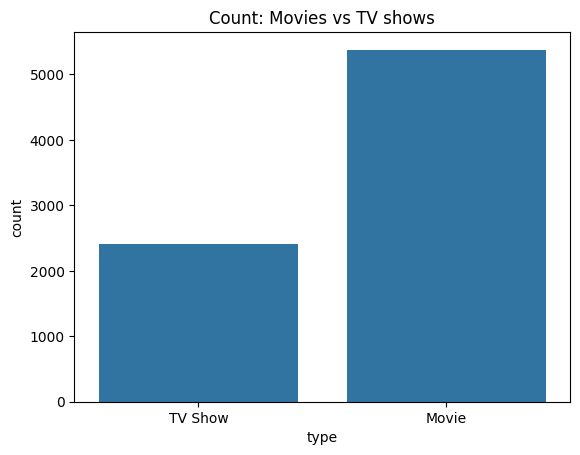

In [14]:
# 5. Exploratory Data Analysis (EDA)
# Movies vs TV Shows
sns.countplot(x ='type', data=df)
plt.title('Count: Movies vs TV shows')
plt.show()


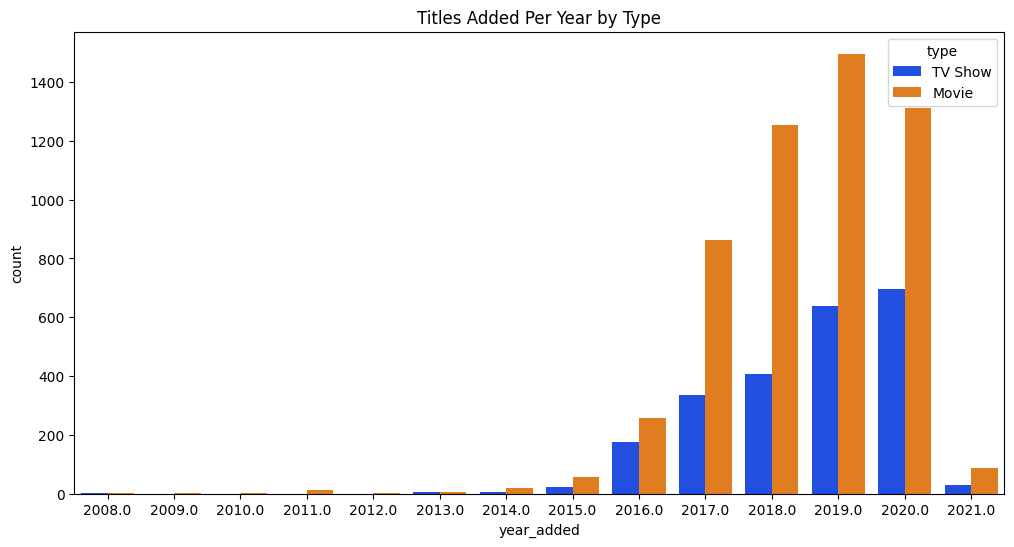

In [15]:
# Content Added per Year by Type

plt.figure(figsize=(12,6))
sns.countplot(x='year_added', hue='type',data=df, palette='bright')
plt.title('Titles Added Per Year by Type')
plt.show()

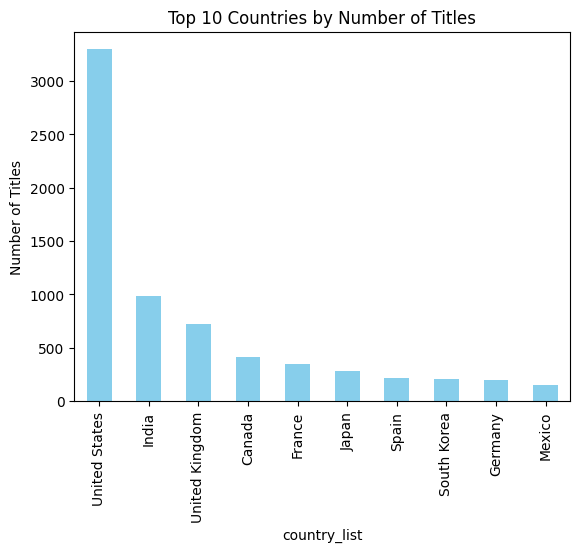

In [16]:
# Top 10 Countries by Number of Titles

countries = df.explode('country_list')
top_countries = countries['country_list'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue', title='Top 10 Countries by Number of Titles')
plt.ylabel('Number of Titles')
plt.show()

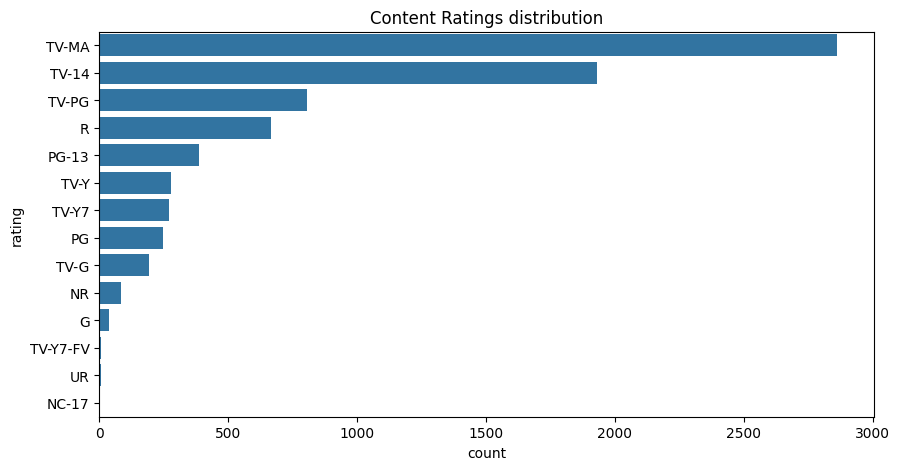

In [17]:
# Distribution of Content Ratings

plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Content Ratings distribution')
plt.show()

In [18]:
# 6. Feature Engineering - Text Preprocessing

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['description'])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (7787, 5000)


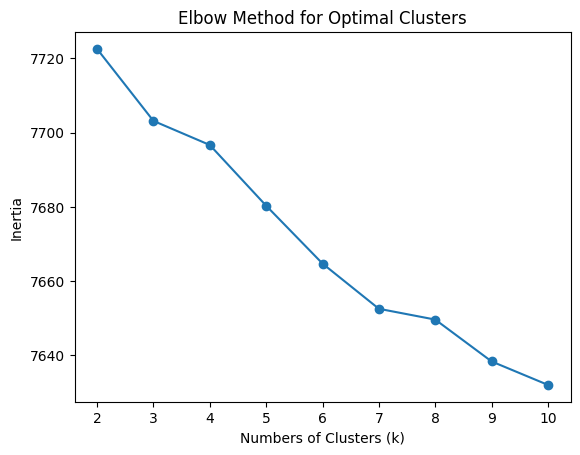

In [19]:
# 7. Elbow Method for Optimal Clusters

inertia = []
K_range = range(2,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(tfidf_matrix)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Numbers of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [21]:
# 8. Clustering (KMeans & Agglomerative)
from sklearn.cluster import KMeans, AgglomerativeClustering

k = 5 #Choose based on elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(tfidf_matrix)

agglo = AgglomerativeClustering(n_clusters=k)
df['cluster_agglo'] = agglo.fit_predict(tfidf_matrix.toarray())

df[['title', 'type', 'cluster_kmeans', 'cluster_agglo']].head()

,title,type,cluster_kmeans,cluster_agglo
0,3%,TV Show,1,1
1,7:19,Movie,1,1
2,23:59,Movie,1,1
3,9,Movie,1,1
4,21,Movie,1,3


In [25]:
# 9. Cluster Analysis

terms = vectorizer.get_feature_names_out()
def print_top_terms_per_cluster(tfidf_mat, labels, n_terms=10):
    import numpy as np
    for cl in np.unique(labels):
       idxs = np.where(labels == cl)[0]
       mean_tfidf = tfidf_mat[idxs].mean(axis=0).A1
       top_terms_idxs = mean_tfidf.argsort()[::-1][:n_terms]
       top_terms = [terms[i] for i in top_terms_idxs]
       print(f"Cluster {cl}: {','.join(top_terms)}")

print("Top words in each KMeans cluster:")
print_top_terms_per_cluster(tfidf_matrix, df['cluster_kmeans'])

# Show sample titles from each cluster
for cl in range(k):
    print(f"\nSample titles from KMeans Cluster {cl}:")
    print(df[df['cluster_kmeans']==cl]['title'].head(8).to_list())

Top words in each KMeans cluster:
Cluster 0: man,young,woman,life,father,family,wife,finds,old,daughter
Cluster 1: life,world,new,family,young,documentary,series,woman,lives,takes
Cluster 2: love,town,small,life,young,falls,woman,new,fall,girl
Cluster 3: help,new,young,friends,home,friend,need,world,father,woman
Cluster 4: friends,school,high,best,new,student,students,life,teen,group

Sample titles from KMeans Cluster 0:
['#FriendButMarried', '10 Days in Sun City', '100% Halal', '13 Sins', '20 Minutes', '24 Hours to Live', '7 (Seven)', '7 Din Mohabbat In']

Sample titles from KMeans Cluster 1:
['3%', '7:19', '23:59', '9', '21', '46', '122', '706']

Sample titles from KMeans Cluster 2:
['15-Aug', '\u200bMaj Rati \u200b\u200bKeteki', '#Roxy', 'Çarsi Pazar', '100 Days My Prince', '21 Thunder', '365 Days', '48 Christmas Wishes']

Sample titles from KMeans Cluster 3:
['#Alive', '1 Mile to You', '100 Meters', '20th Century Women', '30 Days of Luxury', '300 Miles to Heaven', '45 rpm', '4th Ma

In [26]:
df.to_csv('netflix_titles_clustered.csv', index=False)